### Data exploration and visualization

In [1]:
# Data mining project
# Data exploration and visualization
# Sneha P V
# Red ID: 823352420

##### Importing packages for visualization

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col,sum,count

##### To read data from dataset csv file and take a random sample to reduce computation time

In [3]:
customer_purchase_data1 = pd.read_csv("./BlackFriday.csv",index_col=False)
print("Size of entire dataset:",customer_purchase_data1.shape)

Size of entire dataset: (537577, 12)


##### To reduce dataset

In [4]:
customer_purchase_data=customer_purchase_data1.sample(frac=0.1, random_state=1)
print("Size of reduced dataset:",customer_purchase_data.shape)

Size of reduced dataset: (53758, 12)


##### Visualizations

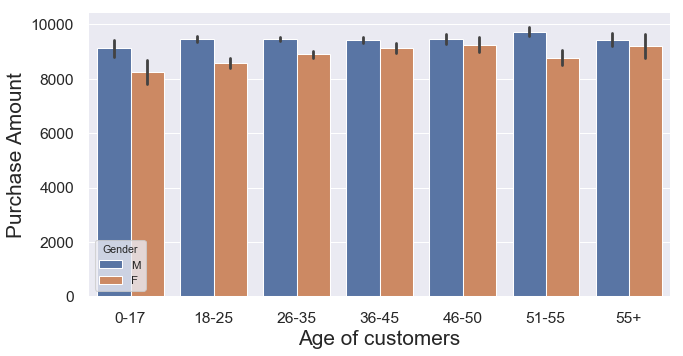

In [6]:
# barplot to show customer's age group,gender and the amount they spent on purchase

plt.figure(figsize=(10,5),dpi=75)
sns.set(style="darkgrid")

df1=customer_purchase_data.sort_values(by=['Age'])
b=sns.barplot(x='Age',y='Purchase',hue='Gender',data=df1)

b.set_xlabel("Age of customers",fontsize=20)
b.set_ylabel("Purchase Amount",fontsize=20)
b.tick_params(labelsize=15)
sns.despine(offset=5)

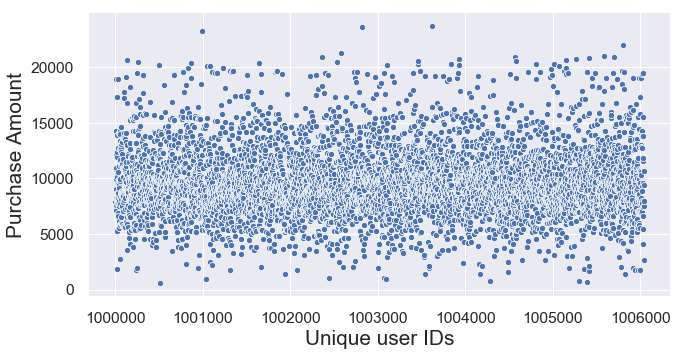

In [7]:
# scatterplot to depict the mean purchase range of individual customers

p=customer_purchase_data[['Gender','User_ID','Purchase']]
p=p.groupby(by=p['User_ID'],as_index=False)['Purchase'].mean()

plt.figure(figsize=(10,5),dpi=75)
sns.set(style="darkgrid")

b=sns.scatterplot(x='User_ID',y='Purchase',data=p)

b.set_xlabel("Unique user IDs",fontsize=20)
b.set_ylabel("Purchase Amount",fontsize=20)
b.tick_params(labelsize=15)
sns.despine(offset=5)


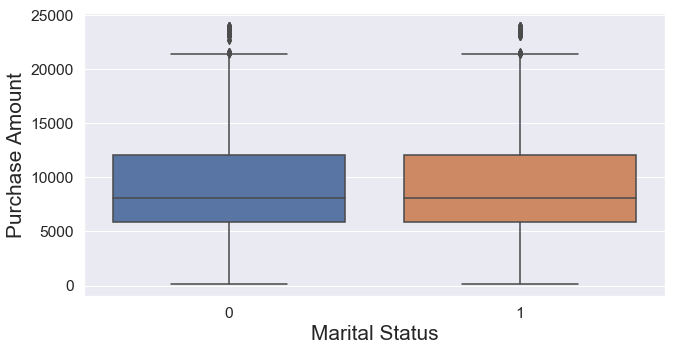

In [8]:
# box plot to show purchase range for married and unmarried customers

plt.figure(figsize=(10,5),dpi=75)
sns.set(style="darkgrid")

b=sns.boxplot(x='Marital_Status',y='Purchase',data=customer_purchase_data)

b.set_xlabel("Marital Status",fontsize=20)
b.set_ylabel("Purchase Amount",fontsize=20)
b.tick_params(labelsize=15)


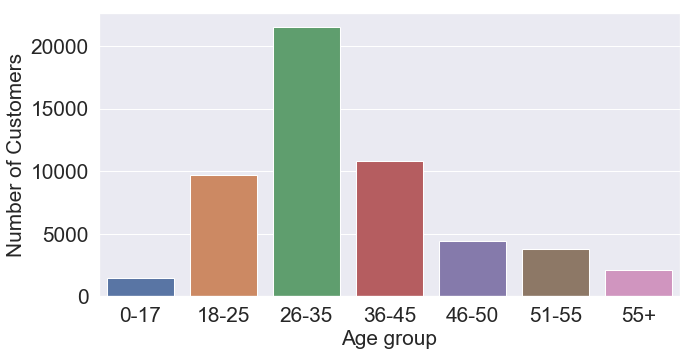

In [9]:
# bar plot for age and number of customers in that age group

plt.figure(figsize=(10,5),dpi=75)
sns.set(style="darkgrid")

k=customer_purchase_data.groupby(by=customer_purchase_data['Age'],as_index=False)['User_ID'].count()
k.rename(columns={'User_ID':'Count'},inplace=True)

b=sns.barplot(x='Age',y='Count',data=k)

b.set_xlabel("Age group",fontsize=20)
b.set_ylabel("Number of Customers",fontsize=20)
b.tick_params(labelsize=20)
